In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("../Data/Processed/processed.csv")

In [2]:
total_cases_per_million_column = '2'
total_deaths_per_million_column = '3'

input = data.drop([total_cases_per_million_column, total_deaths_per_million_column], axis=1)
target = data[[total_cases_per_million_column,total_deaths_per_million_column]]

In [3]:
from sklearn.cluster import KMeans

input_kmeans = KMeans(n_clusters=10, random_state=0).fit(input)
target_kmeans = KMeans(n_clusters=10, random_state=0).fit(target)


In [4]:
from sklearn.metrics import homogeneity_completeness_v_measure

homogenity, completeness, v_measure = homogeneity_completeness_v_measure(target_kmeans.labels_, input_kmeans.labels_)
homogenity, completeness, v_measure

(0.123659585455732, 0.08820240949708047, 0.10296394496837431)

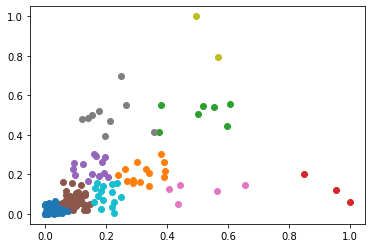

In [26]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 

xs = target[total_cases_per_million_column]
ys = target[total_deaths_per_million_column]

colors = list(mcolors.TABLEAU_COLORS.values())


for i in range(len(xs)):
    plt.scatter(xs[i], ys[i], color=colors[target_kmeans.labels_[i]])